In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 1)

folder = './052018_plate2/'

path_cyt = folder + 'Cytoplasm_Cancer_May2018_2.xlsx'

markers = ['Cell ID', 
           'Nucleus (Cycle 1 - DAPI)',
           'BT474-H2BeGFP (Cycle 1 - FITC)', 
           'MCL1 (Cycle 2 - Cy3)', 
           'p-p65NFkB (Cycle 2 - Cy5)', 
           'p-Akt (Cycle 3 - FITC)',
           'aSMA (Cycle 3 - Cy3)',
           'p-gH2AX (Cycle 3 - Cy5)',
           'GRP78 (Cycle 4 - FITC)',
           'Vimentin (Cycle 4 - Cy3)',
           'Ki67 (Cycle 5 - FITC)',
           'p-Rb (Cycle 5 - Cy3)',
           'FN (Cycle 5 - Cy5)',
           'FAP (Cycle 6 - Cy3)',
           'SOX2 (Cyccle 6 - Cy5)']

tabs = ['BT474,Cntrl(rb,c2-4)', 
        'BT474,30nM(rb,c5-7)',
        'BT474,300nM(rb,c8-10)',
        
        'BT474+C3H-scr,Cntrl(rc,c2-4)',
        'BT474+C3H-scr,30nM(rc,c5-7)',
        'BT474+C3H-scr,300nM(rc,c8-10)',
        
        'BT474+C3H-1,Cntrl(rd,c2-4)',
        'BT474+C3H-1,30nM(rd,c5-7)',
        'BT474+C3H-1,300nM(rd,c8-10)',
        
        'BT+AR22,Cntrl(re,c2-4)',
        'BT+AR22,30nM(re,c5-7)',
        'BT+AR22,300nM(re,c8-10)',
        
        'BT+hMSC,Cntrl(rf,c2-4)',
        'BT+hMSC,30nM(rf,c5-7)',
        'BT+hMSC,300nM(rf,c8-10)']

def concat_df(path):
    dt = []
    for t in tabs:
        dt.append(pd.read_excel(open(path, 'rb'), sheet_name=t, names=markers))
    df = pd.concat(dt, ignore_index=True)
    return df

In [2]:
df_cyt = concat_df(path_cyt)
df_cyt['Group'] = df_cyt['Cell ID'].apply(lambda x: ((x // 10**9) % 10 - 1) // 3)
print('*** Cytoplasm Dataset:')
df_cyt

*** Cytoplasm Dataset:


,Cell ID,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Ki67 (Cycle 5 - FITC),p-Rb (Cycle 5 - Cy3),FN (Cycle 5 - Cy5),FAP (Cycle 6 - Cy3),SOX2 (Cyccle 6 - Cy5),Group
0,11100020011,7.7e+05,74462.7,66390.9,188129.5,70622.5,33918.0,29749.2,59214.9,51360.5,22255.7,16048.4,18619.3,29313.7,18391.7,0
1,11100030022,2.7e+06,427953.1,191264.9,249321.8,135855.4,58219.0,56154.2,121266.5,60755.1,49693.9,38877.2,33284.6,66032.7,41370.0,0
2,11100040011,3.4e+05,64204.7,110122.9,125686.5,59472.2,23581.0,17910.3,18721.2,27914.5,19758.7,13533.6,15094.9,23274.5,14658.5,0
3,11100050026,1.5e+06,196596.0,325263.5,540408.3,192670.9,87410.4,59636.0,90039.9,100308.1,74684.3,45509.0,52551.7,77627.0,43702.2,0
4,11100060016,6.2e+05,116523.8,98122.7,232641.7,70130.9,47607.0,44557.2,48540.9,44109.8,36785.2,26767.4,73713.9,44027.4,28905.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314378,59907841034,7.9e+04,13000.4,64874.6,14465.8,0.0,0.0,0.0,0.0,0.0,12506.2,10550.9,8431.7,0.0,0.0,2
314379,59907851034,3.1e+05,46294.3,128173.3,35807.9,0.0,0.0,0.0,0.0,0.0,30810.5,18730.5,12485.0,0.0,0.0,2
314380,59907861035,5.4e+04,12499.5,18700.8,11698.0,0.0,0.0,0.0,0.0,0.0,9295.2,8153.3,19008.1,0.0,0.0,2
314381,59907871036,3.7e+05,14982.9,85115.5,98166.8,0.0,0.0,0.0,0.0,0.0,15840.4,6009.5,9470.1,0.0,0.0,2


In [3]:
# All columns in the Cytoplasm dataset's information
df_cyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314383 entries, 0 to 314382
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Cell ID                         314383 non-null  int64  
 1   Nucleus (Cycle 1 - DAPI)        314383 non-null  float64
 2   BT474-H2BeGFP (Cycle 1 - FITC)  314383 non-null  float64
 3   MCL1 (Cycle 2 - Cy3)            314383 non-null  float64
 4   p-p65NFkB (Cycle 2 - Cy5)       314383 non-null  float64
 5   p-Akt (Cycle 3 - FITC)          314383 non-null  float64
 6   aSMA (Cycle 3 - Cy3)            314383 non-null  float64
 7   p-gH2AX (Cycle 3 - Cy5)         314383 non-null  float64
 8   GRP78 (Cycle 4 - FITC)          314383 non-null  float64
 9   Vimentin (Cycle 4 - Cy3)        314383 non-null  float64
 10  Ki67 (Cycle 5 - FITC)           314383 non-null  float64
 11  p-Rb (Cycle 5 - Cy3)            314383 non-null  float64
 12  FN (Cycle 5 - Cy

In [4]:
# Check if duplicate ID exists in Cytoplasm dataset
df_cyt['Cell ID'].value_counts()

13300140031    1
59803250632    1
44108380762    1
22200040034    1
41905920614    1
              ..
48506420993    1
52701410151    1
42408600918    1
45310140779    1
58705190653    1
Name: Cell ID, Length: 314383, dtype: int64

In [5]:
df_cyt['Group'].value_counts()

0    106625
1    106576
2    101182
Name: Group, dtype: int64

In [6]:
# Cytoplasm markers' statistics
df_cyt[df_cyt.columns[1:-1]].describe()

,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Ki67 (Cycle 5 - FITC),p-Rb (Cycle 5 - Cy3),FN (Cycle 5 - Cy5),FAP (Cycle 6 - Cy3),SOX2 (Cyccle 6 - Cy5)
count,3.1e+05,3.1e+05,3.1e+05,3.1e+05,314383.0,3.1e+05,3.1e+05,314383.0,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05
mean,7.1e+05,6.3e+04,1.4e+05,7.6e+04,35424.4,2.5e+04,2.1e+04,19795.4,2.4e+04,2.4e+04,2.4e+04,2.0e+04,3.5e+04,1.8e+04
std,5.8e+05,9.9e+04,1.3e+05,1.1e+05,31580.7,4.5e+04,4.3e+04,20586.8,3.8e+04,1.7e+04,2.6e+04,1.2e+04,5.3e+04,1.8e+04
min,3.1e+04,6.5e+03,0.0e+00,4.8e+03,0.0,0.0e+00,0.0e+00,0.0,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00
25%,3.8e+05,2.3e+04,5.8e+04,2.1e+04,19257.8,1.6e+04,1.5e+04,9016.7,1.6e+04,1.8e+04,1.4e+04,1.5e+04,2.6e+04,1.4e+04
50%,5.4e+05,3.1e+04,9.2e+04,3.0e+04,24699.2,2.0e+04,1.9e+04,14809.7,1.9e+04,2.2e+04,1.8e+04,1.8e+04,3.1e+04,1.7e+04
75%,8.3e+05,5.4e+04,1.6e+05,8.3e+04,38120.7,2.6e+04,2.3e+04,21891.5,2.5e+04,2.7e+04,2.7e+04,2.3e+04,3.9e+04,2.1e+04
max,1.5e+07,2.8e+06,7.7e+06,2.2e+06,855250.0,5.9e+06,1.6e+07,777235.8,7.5e+06,4.3e+06,3.6e+06,1.1e+06,9.6e+06,4.5e+06


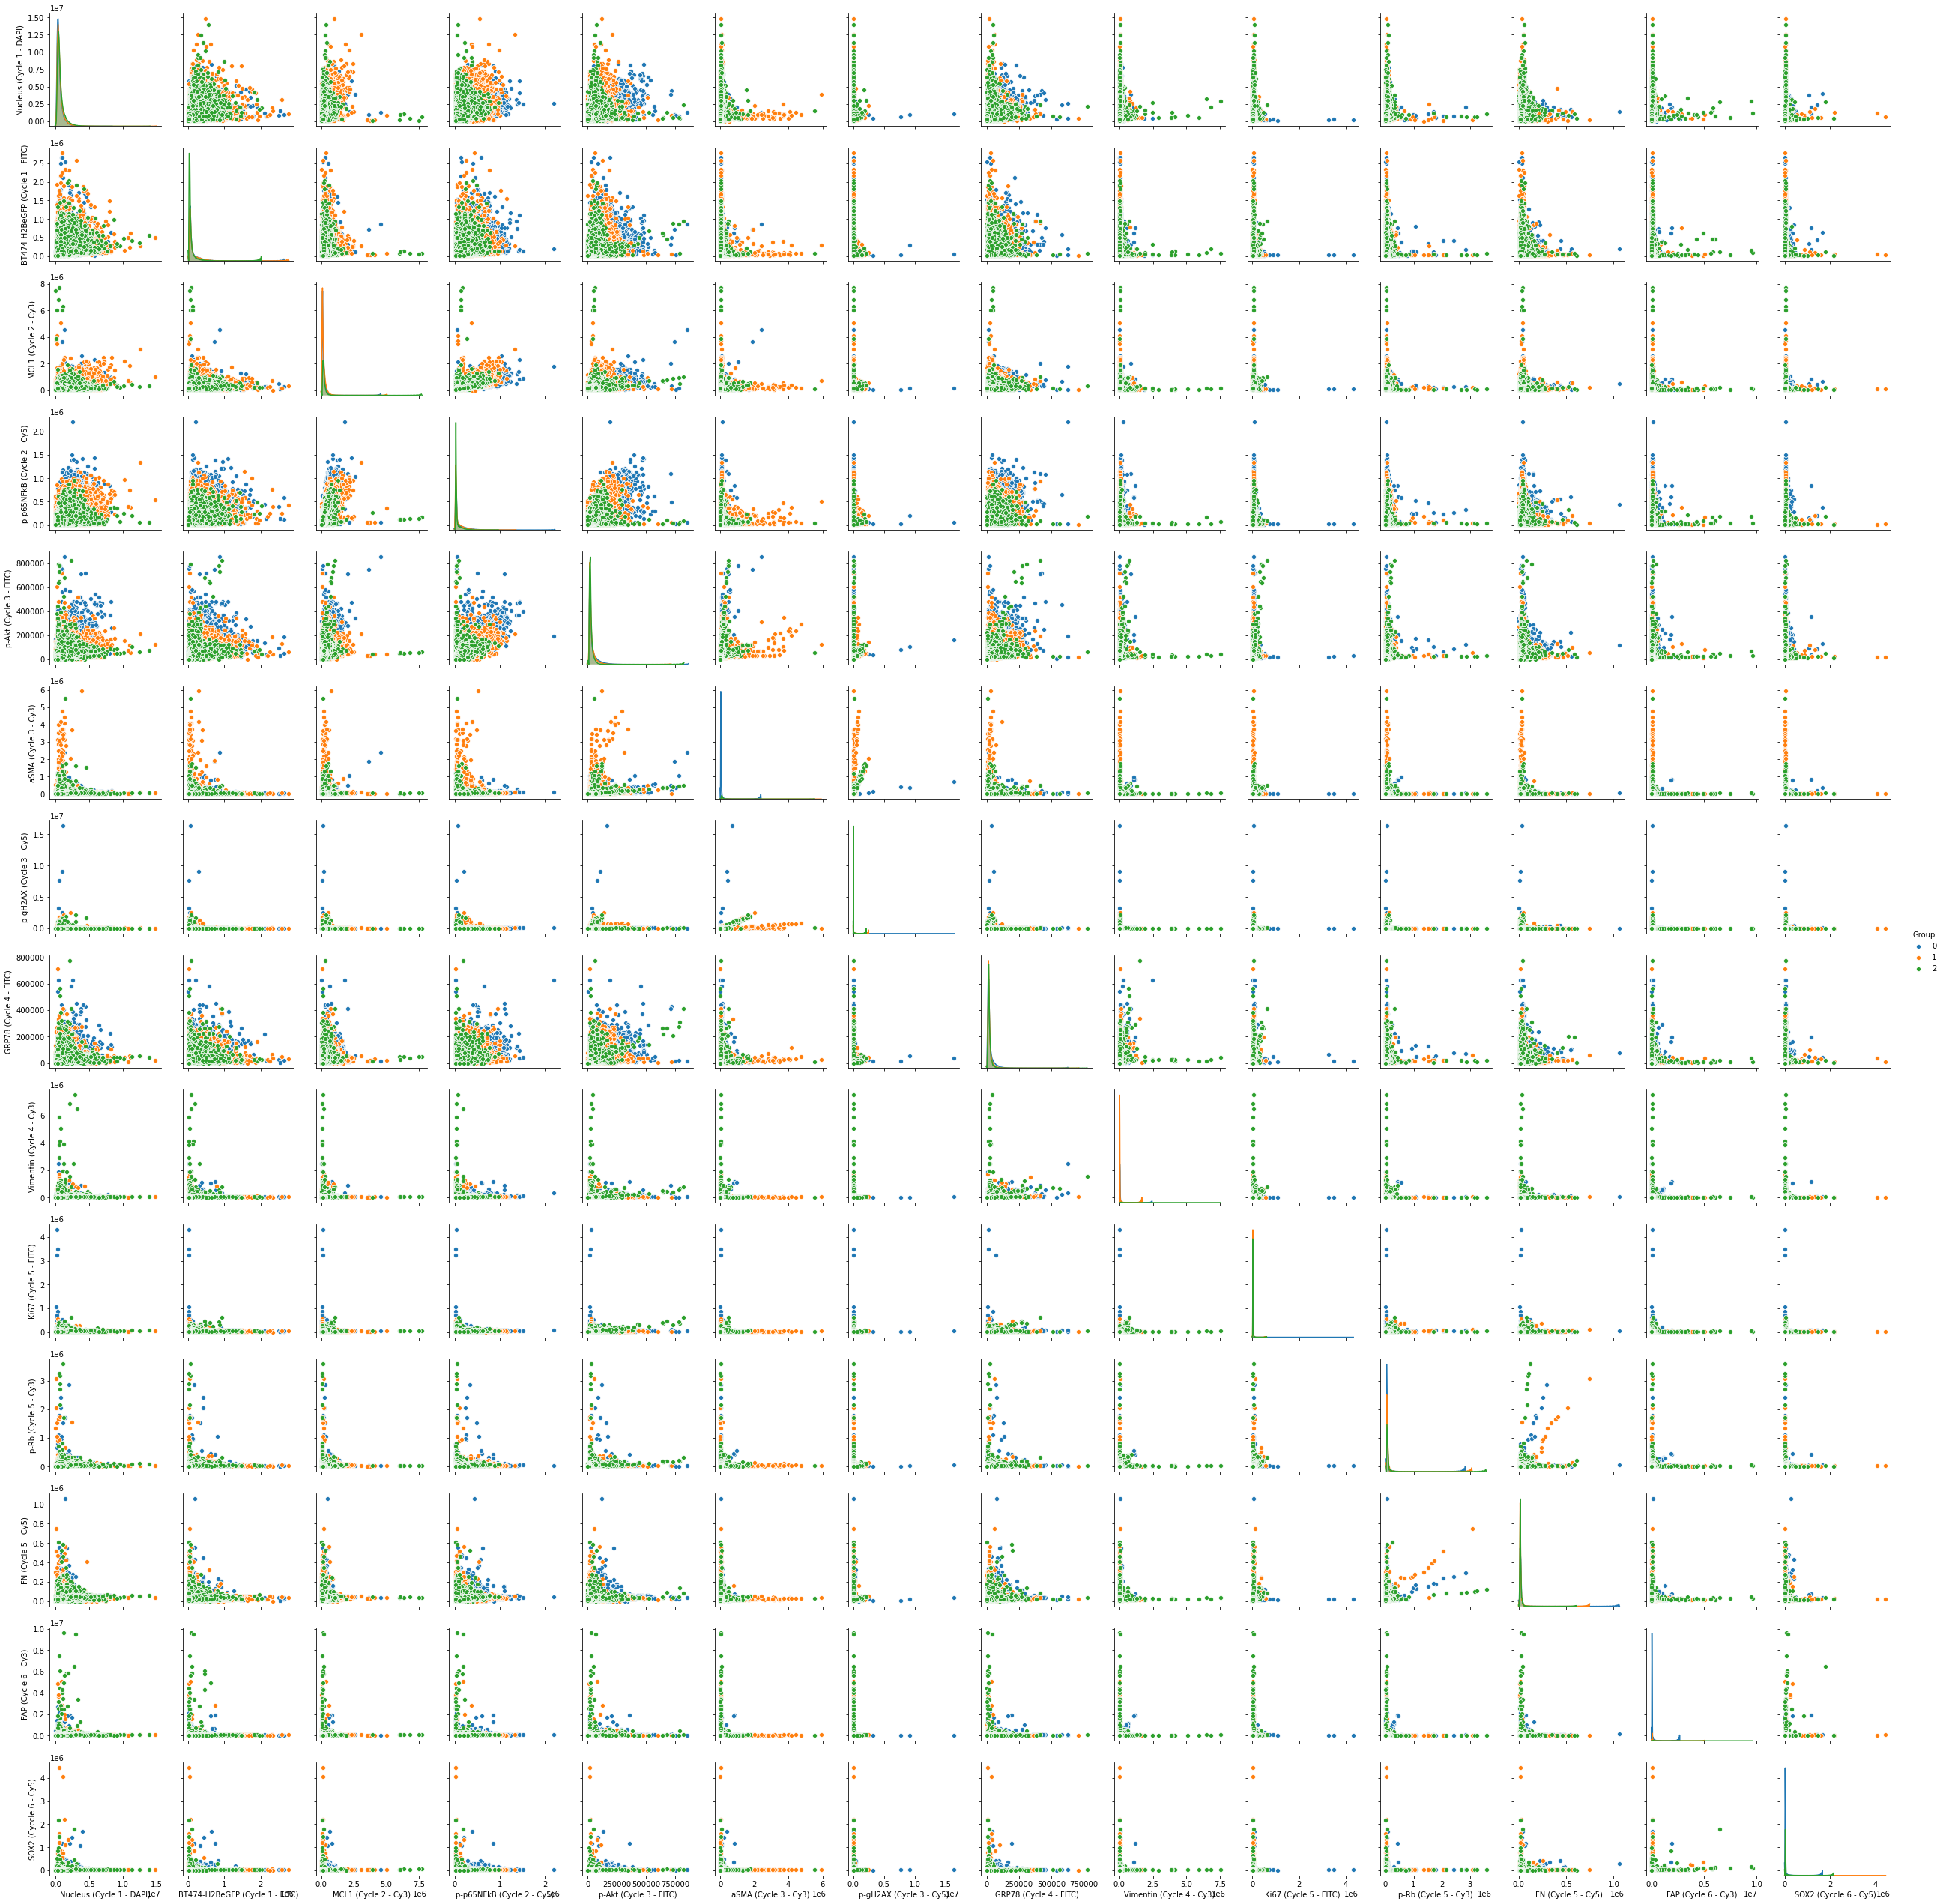

In [7]:
sns.pairplot(data=df_cyt, vars=df_cyt.columns[1:-1], hue='Group');